<a href="https://colab.research.google.com/github/ttaye165/github-introfall25-ttaye165/blob/main/In_Class_Assignment_5_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Programming - In-Class Assignment


Import necessary libraries and load the data

From kaggle (https://www.kaggle.com/datasets/yasserh/titanic-dataset):
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren't enough lifeboats for everyone on board, resulting in the death ofmore than half of the passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

This exercise seeks to explore the factors that appeared to influence survival.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the 'titanic' dataset from seaborn
titanic_data = sns.load_dataset('titanic')

display(titanic_data.head())
print(titanic_data.shape)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


(891, 15)


Task 1: Calculate overall survival rate.

Hint: becausse 'survived' is 0 and 1, survival rate can be computed as the .mean() of that column

In [9]:
# Calculate overall survival rate
titanic_data['survived'].mean()

np.float64(0.3838383838383838)

Task 2: Calculate and print the survival rates by gender/sex ('sex'), passenger class ('class'), and embarkation point ('embarked'; the location where the journey began).

Hint: the material showed us how to filter material, which can work here. Pandas dataframes also offers a convenient function groupby, that will take a one or a list of columns, and group the data by the values of that/those column(s). Operations (such as .mean()) on the returned item will be performed on each group.

In [10]:
# Calculate survival rates by gender and visualize it
titanic_data.groupby('sex')['survived'].mean()

,survived
sex,
female,0.742038
male,0.188908


In [11]:
# Calculate survival rates by passenger class and visualize it
titanic_data.groupby('class')['survived'].mean()

/tmp/ipython-input-290413747.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_data.groupby('class')['survived'].mean()


,survived
class,
First,0.629630
Second,0.472826
Third,0.242363


In [12]:
# Calculate survival rates by embarkation point and visualize it
titanic_data.groupby('embarked')['survived'].mean()

,survived
embarked,
C,0.553571
Q,0.389610
S,0.336957


Task 3: Calculate the survival rate by age group (under 12 as child, 13-20 as teen, 21-40 as adult, 41-60 as middle-aged, above 61 as senior).

In [20]:
# create a new column age_group based on the criteria above
# Calculate survival rates by age group

titanic_data['age_group'] = pd.cut(
    titanic_data['age'],
    bins=[0, 12, 20, 40, 60, float('inf')],
    labels=['child', 'teen', 'adult', 'middle-aged', 'senior']
)
survival_by_age_group = titanic_data.groupby('age_group')['survived'].mean()

# Print results
print("Survival Rates by Age Group:")
print(survival_by_age_group)

Survival Rates by Age Group:
age_group
child          0.579710
teen           0.381818
adult          0.397403
middle-aged    0.390625
senior         0.227273
Name: survived, dtype: float64


/tmp/ipython-input-609172048.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_group = titanic_data.groupby('age_group')['survived'].mean()


Task 4: Create a box plot for age distribution by survival.

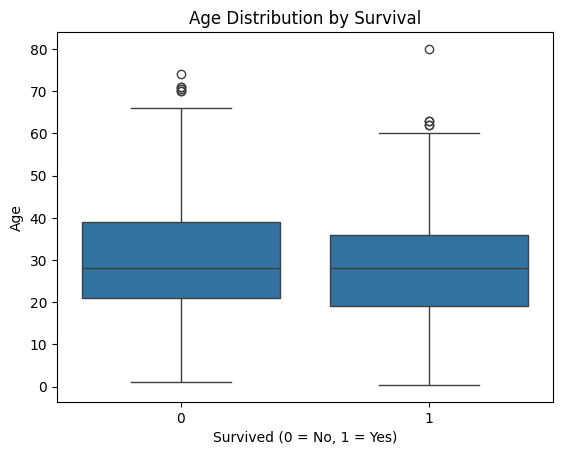

In [22]:
# Create a box plot for age distribution by survival
sns.boxplot(x='survived', y='age', data=titanic_data)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')

# Show the plot
plt.show()

Task 5: Create a stacked bar chart to visualize the distribution of Titanic passengers by class, using different colors to represent survival status within each class.
Hint: try creating a comment to do this one and use the AI to help. What is this code doing?

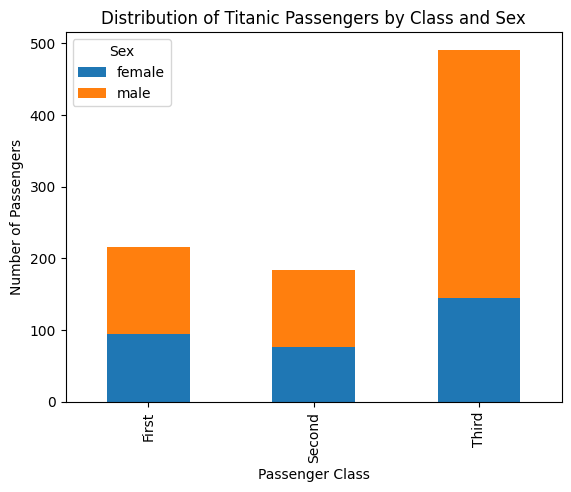

In [24]:
import matplotlib.pyplot as plt

# Create a stacked bar chart for the distribution of Titanic passengers by class
class_sex_counts = pd.crosstab(titanic_data['class'], titanic_data['sex'])

# Plot stacked bar chart
class_sex_counts.plot(kind='bar', stacked=True)

# Add labels and title
plt.title('Distribution of Titanic Passengers by Class and Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.legend(title='Sex')
plt.show()


**Open-Ended Questions:** From our analysis, some more in-depth questions can be raised. Please discuss and attempt to answer them by using Python to perform data analysis and visualizations to support your claims. Keep in mind that there are no definitive answers to these questions.

Question 1: Given, from task 2, the survival rates by embarkation point are as follows:

| Embarkation Point | Survival Rate (%) |
|-------------------|--------------------|
| C                 | 55.36              |
| Q                 | 38.96              |
| S                 | 33.70              |

does this indicate that, if you will be on the Titanic, better to select Port C as your embarkation point for increasing the chances of survival?

**Your Q1 discussion here:**

In [ ]:
# Optional: if you have code to support your Q1 discussion, please add it here.


Question 2: Given, from task 3, the survival rates by age group are as follows:

| Age Group | Survival Rate (%) |
|-----------|--------------------|
| Child     | 57.97              |
| Teen      | 38.18              |
| Adult     | 39.74              |
| Middle-Aged| 39.06              |
| Senior    | 22.73              |

Does this indicate that senior passengers were less taken care of?



**Your Q2 discussion here:**

In [ ]:
# Optional: if you have code to support your Q2 discussion, please add it here.


When you are done, make sure to submit your assignments in accordance with the instructions on canvas.